# <span style="color:green"> Numerical Simulation Laboratory (NSL) </span>
## <span style="color:blue">  Numerical exercises 10</span>

In [3]:
import matplotlib.pyplot as plt
import numpy as np

### Exercise 10.1

The goal of lesson 10 is to *adapt* the Genetic Algorithm code written in the previous lesson to have a C++ code to solve the TSP with a Simulated Annealing (SA) algorithm.
The program exploits the previously implemented genetic mutation (randomly drawn) as proposed move for the algorithm.

Like in the previous lesson I applied my code to optimize the path among 32 cities randomly placed on a circumference and 32 cities randomly placed inside a square. 
The two generated world are the same of the `NSL-10`. 
In this way I can compare the results obtained via Genetic Algoritmh and Simulated Anneling.

Once I obtained the data I produced a picture the length of the optimized path as a function of the iterations of the SA algorithm and a picture of such path for both the circular and the square dispositions of the cities. 
Icompared both graphs with those obtained with the Genetic Algorithm.

Chosen parameters are:

- Starting temperature $T_{init} = 1.5$;
- Delta temperature $\Delta T = 0.001$;
- Monte Carlo steps per temperature: $1000$;

Results are shown below.

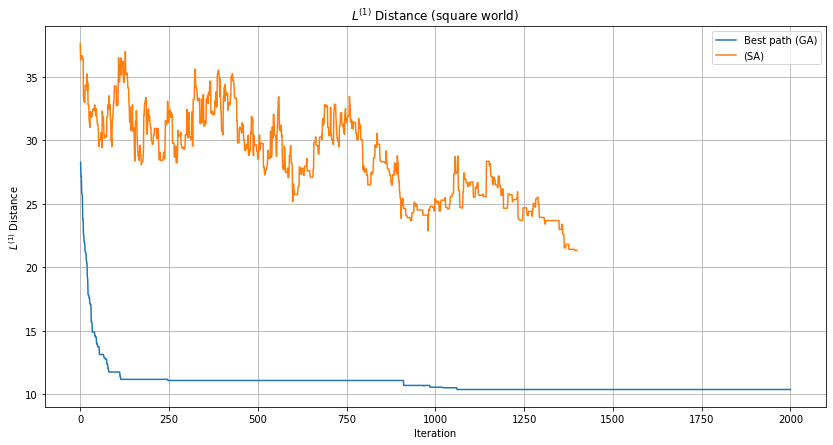

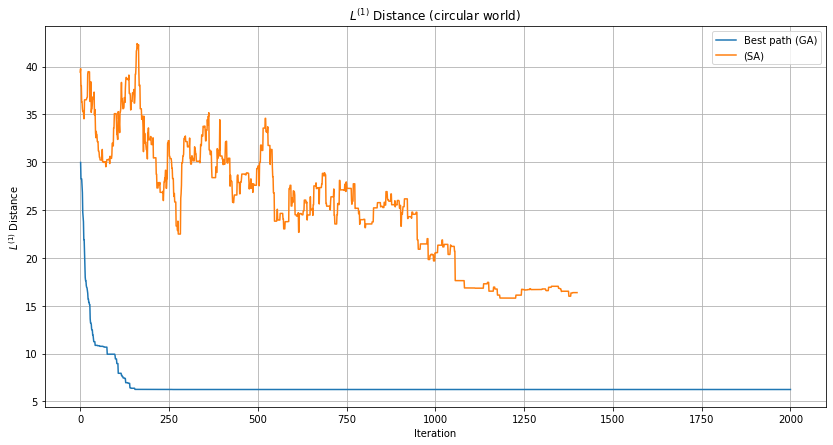

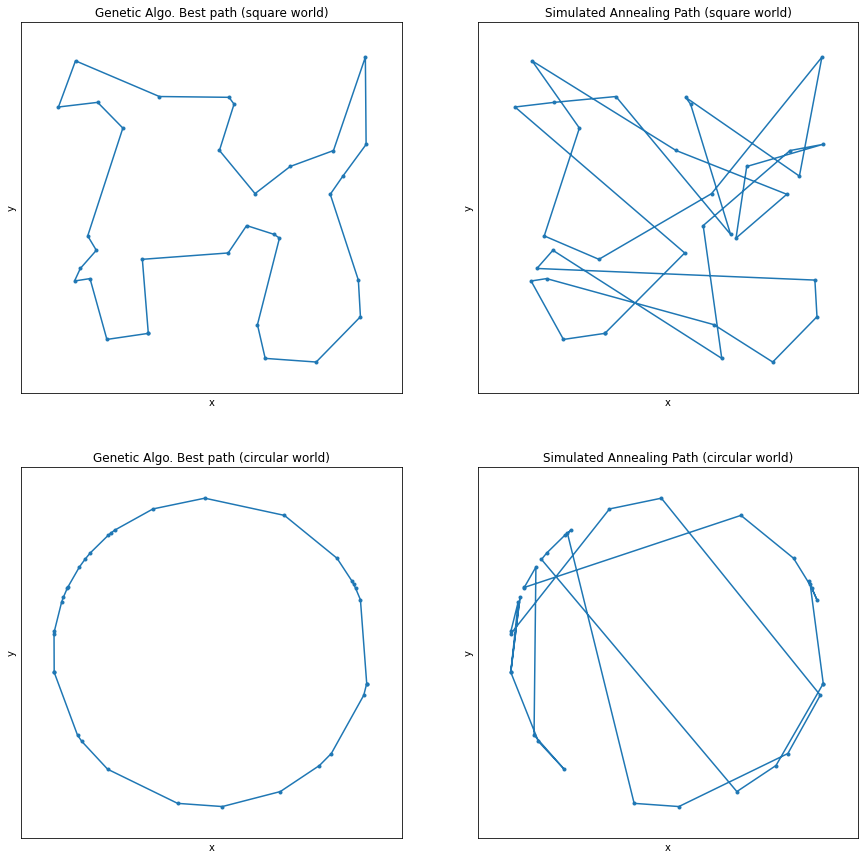

In [7]:
# Load data square world (SA)
x_sq_distance, y_sq_distance = np.loadtxt("../results/square/path_distance.dat", unpack = True, usecols=(0,2))
x_sq_path, y_sq_path = np.loadtxt("../results/square/path.dat", unpack = True)
# Load data circle world (SA)
x_circ_distance, y_circ_distance = np.loadtxt("../results/circle/path_distance.dat", unpack = True, usecols=(0,2))
x_circ_path, y_circ_path = np.loadtxt("../results/circle/path.dat", unpack = True)
# Load data square world (GA)
x_sq_best, y_sq_best = np.loadtxt("../../NSL-09/results/square/distance_of_best_path.dat", unpack = True)
x_sq_path_GA, y_sq_path_GA = np.loadtxt("../../NSL-09/results/square/best_path.dat", unpack = True)
# Load data circle world (GA)
x_circ_best, y_circ_best = np.loadtxt("../../NSL-09/results/circle/distance_of_best_path.dat", unpack = True)
x_circ_path_GA, y_circ_path_GA = np.loadtxt("../../NSL-09/results/circle/best_path.dat", unpack = True)


# Plot L1 distance best and average vs generation (square world)
plt.figure(1, figsize = (14, 7))
plt.title("$L^{(1)}$ Distance (square world)")
plt.plot(x_sq_best, y_sq_best, label="Best path (GA)")
plt.plot(x_sq_distance, y_sq_distance, label="(SA)")
plt.xlabel('Iteration')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)
plt.legend()

# Plot L1 distance best and average vs generation (circle world)
plt.figure(2, figsize = (14, 7))
plt.title("$L^{(1)}$ Distance (circular world)")
plt.plot(x_circ_best, y_circ_best, label="Best path (GA)")
plt.plot(x_circ_distance, y_circ_distance, label="(SA)")
plt.xlabel('Iteration')
plt.ylabel('$L^{(1)}$ Distance')
plt.grid(True)
plt.legend()

# Plot best path 
plt.figure(3, figsize = (15, 15))
# Square world
plt.subplot(2, 2, 1)
plt.title("Genetic Algo. Best path (square world)")
plt.plot(x_sq_path_GA, y_sq_path_GA,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 2)
plt.title("Simulated Annealing Path (square world)")
plt.plot(x_sq_path, y_sq_path,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
# Circle world
plt.subplot(2, 2, 3)
plt.title("Genetic Algo. Best path (circular world)")
plt.plot(x_circ_path_GA, y_circ_path_GA,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])
plt.subplot(2, 2, 4) 
plt.title("Simulated Annealing Path (circular world)")
plt.plot(x_circ_path, y_circ_path,  marker=".")
plt.xlabel('x')
plt.ylabel('y')
plt.xlim((-1.2, 1.2))
plt.ylim((-1.2, 1.2))
plt.xticks([])
plt.yticks([])

plt.show()

### Exercise 10.2

Parallelize with MPI libraries your Genetic Algorithm code in order to solve the TSP by performing a *Genetic Search* with 4 **parallel GA searches of the optimal path**:
each node should perform an independent GA search the so-called *Continents*, **but** every $N_{migr}$ generations the *Continents* should exchange their best individuals randomly.
Apply your code to the TSP problem for 32 cities randomly placed inside a square and try to estimate if your performances improve with *Continents*.